<div style="background-color:lightblue">
<h1><center>
    The Data Science Labs on <br/>
     Multivariable Calculus  <br/>
   <small>by Kindyl King and Mireille Boutin</small>
</center></h1>
    </div>

<h1><center>
    Laboratory on<br/>
    Human Perception of Color<br/>
    <p style="font-size: 16px"> Last Updated on March , 2022</p>
</center></h1>

<h2 style="color:orange;"><left>00. Content </left></h2>

### Mathematics ###
- 3 dimensional vectors
- numerical and symbolic integration
- injectivity and surjectivity of maps
- polynomial fitting
- numerical differentiation
- cross and dot product
- Euclidean distance
    
### Programming Skills ###
- multi-dimensional array manipulation
- functions
    
### Embedded Systems ###
- Thonny and MicroPython

<h2 style="color:orange;"><left>0. Required Hardware </left></h2> 

- microcontroller: Raspberry Pi Pico
- breadboard
- USB connector
- NeoPixel
- Level shifter


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## RGB Values

Colors in Python can be specified by a red, green, and blue channel value. Each number is an integer between 0-255 and represents the intensity of red, blue, and green light that is mixed together to produce the resulting color. To display the color, we can use Matplotlib's `imshow()` function. The input of this function is a multi-dimensional array that contains information about the size of the image and the color of each pixel. Let's print just one red pixel. That means our image is size $1 \times 1$ and the color we've chosen is the vector $[255,0,0]$. In the following code cell, the variable `color_patch` has shape $(1,1,3)$; the first two dimensions give the number of rows and the number of columns. The third dimension is 3, which tells us that `color_patch` is a $1 \times 1$ array where each entry is a length 3 array.

In [5]:
red = 255
green = 0
blue = 0
color = np.array([red,green,blue])

color_patch = np.array([
    [color]
    ])
print(color_patch.shape)

(1, 1, 3)


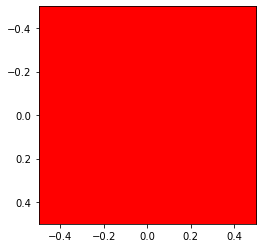

In [6]:
plt.imshow(color_patch)
plt.show()

Let's display a larger red square.
We can create a $2 \times 2 \times 3$ array where each cell is red.

In [7]:
color_patch = np.array([
    [color, color],
    [color, color]
])
print(color_patch.shape)

(2, 2, 3)


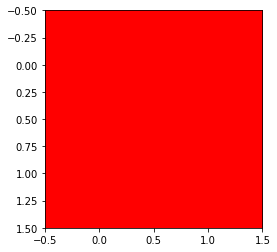

In [8]:
plt.imshow(color_patch)
plt.show()

<h3 style="color:red;"><left> Exercise </left></h3>

Display the following shapes:

1. a green square
2. a blue square
3. a yellow square
4. a Purdue Old Gold square (red,green,blue) = (206, 184, 136)
5. a square that is half red and half yellow

In [9]:
# student answer here

## NeoPixels

<h3 style="color:red;"><left> Exercise </left></h3>

Write a script that makes the NeoPixels display a looping sequence of 3 different colors.

<h3 style="color:red;"><left> Exercise </left></h3>

In a few sentences describe how the color coordinates in Python compare to the color coordinates of the NeoPixels. For example, does red look the same on the NeoPixel as it does here in the Jupyter notebook?

### Duty Cycle 

So how do the NeoPixels work? The NeoPixels use something called pulse-width modulation to display different colors, which means that the LEDs within the NeoPixel are actually switching on and off at a very fast pace (about 400 times per second). Since these pulses of light alternate on and off so quickly, we only see a uniform brightness. The time between pulses determines the intensity of the color. For a half-strength red (127,0,0), the LEDs are still switching from off to full red (255,0,0), but the LED is on for an equal amount of time that it is off. 

<img src="dutycycle.png"/>


[image src](https://learn.adafruit.com/led-tricks-gamma-correction?view=all)

The length of a cycle in the NeoPixel is about 2.5 ms. To further visualize what a duty cycle is, let's pretend that the length of a cycle is 1 second. We can simulate a 50% duty cycle by creating an animation with the library Matplotlib.

In [10]:
%matplotlib notebook
from matplotlib import animation

# plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

fps = 30        # number of frames per second
time = 5        # length of video
percent_on = 15  
fig.suptitle('{}% Duty Cycle'.format(percent_on))   

# set up axis for color
ax[0].axis('off')
im = ax[0].imshow(np.zeros((1,1,3))) 

# set up axis for time plot
ax[1].axis([0,time,0,1.5])
ax[1].set_xlabel('Time')
ax[1].set_yticks([0,1,1.5],['off','on',''])
dc, = ax[1].plot([],[])
t = np.linspace(0,time, num=fps*time)
x = []

def animate(i):
    color = np.array([0,0,255*(i%fps < (percent_on/100*fps))])
    im.set_array( [[color]] )                                   # display the color
    x.append( (i%fps < int(percent_on/100*fps))*1 )
    dc.set_data(t[:i], x[:i])
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=fps*time, interval=1000/fps)
ani

<IPython.core.display.Javascript object>

<ipython-input-10-9e8d20ee8edc>:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[1].set_yticks([0,1,1.5],['off','on',''])


<h3 style="color:red;"><left> Exercise </left></h3>

__Part 1:__ Write a script that flashes the pico's onboard LED with a 30% duty cycle where one cycle is 1 second long.

__Part 2:__ Write a script that flashes green on the NeoPixel with a 30% duty cycle where one cycle is 1 second long.

## Dithering

So far, when we choose a color to display we have 256 choices for the red channel value, 256 choice for the green channel and another 256 choices for blue.
In total, that is $256 \times 256 \times 256 = 16,777,216$ colors available to us, but clearly there is an infinite number of colors. 
Dithering is the process of adding patterns in an image to create the visual effect of colors outside of a fixed color palette.

Suppose that we can only use the colors red and yellow. We can create the illusion of orange by displaying red and yellow pixels in a large checkerboard pattern.

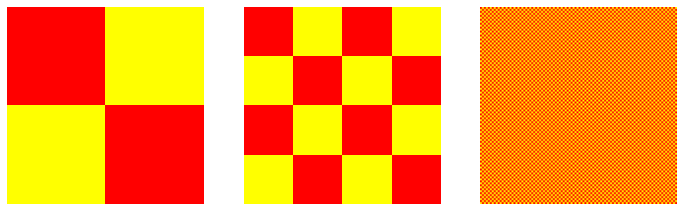

In [11]:
%matplotlib inline
palette = np.array([[255,   0,   0], # index 0: red
                    [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [255, 255,   0]  # index 5: yellow
                    ])

pattern = np.array([     #  make pattern using the index of the color           
    [0,5],               # 0=red, 5=yellow
    [5,0]   ])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].imshow(palette[pattern])
ax[0].axis('off')            
ax[1].imshow(palette[np.tile(pattern, (2,2))])
ax[1].axis('off')
ax[2].imshow(palette[np.tile(pattern, (50,50))])
ax[2].axis('off')
plt.show()

Dithering is applied within the NeoPixels to display a wide range of colors, but the color palette is much larger than simply bright red and yellow. We have red, green, and blue in varying intensities.

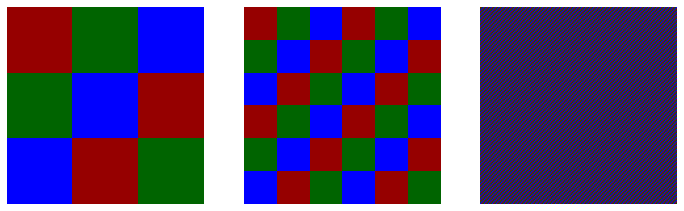

In [12]:
palette = np.array([[150,   0,   0], # index 0: dimmer red
                    [  0, 100,   0], # index 1: dimmer green
                    [  0,   0, 255]  # index 2: blue
                    ])

pattern = np.array([     # make pattern using the index of the color       
    [0,1,2],              
    [1,2,0],
    [2,0,1]   ])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].imshow(palette[pattern])
ax[0].axis('off')            
ax[1].imshow(palette[np.tile(pattern, (2,2))])
ax[1].axis('off')
ax[2].imshow(palette[np.tile(pattern, (50,50))])
ax[2].axis('off')
plt.show()

<h3 style="color:green;"><left> Sandbox </left></h3>

<span style="color:green;"><left> Try out some other patterns with different colors.  </left></span>

In [13]:
# palette = np.array([[150,   0,   0], # index 0: dim red
#                     [  0, 100,   0], # index 1: dim green
#                     [  0,   0, 255] # index 2: blue
#                     ])

# pattern = np.array([     # choose the index of the color           
#     [0,1,2],               # 0=red, 5=yellow
#     [1,2,0],
#     [2,0,1]   ])

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# ax[0].imshow(palette[pattern])
# ax[0].axis('off')            
# ax[1].imshow(palette[np.tile(pattern, (2,2))])
# ax[1].axis('off')
# ax[2].imshow(palette[np.tile(pattern, (50,50))])
# ax[2].axis('off')
# plt.show()

## Color Matching Experiments

Let's see the effects of changing the red, green, and blue channel values by creating a short animation. Let's fix the red and green channel values at 120 and we will vary the blue value from 0 to 255 stepping by 1.

In [14]:
%matplotlib notebook
from matplotlib import animation

plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots()
ax.axis('off')
im = ax.imshow( np.zeros((1,1,3)) ) 
fps = 30                                                        # number of frames per second

def animate(i):
    color = np.array([120,120,i])                               # define the color as a function of i
    im.set_array( [[color]] )                                   # display the color
    ax.set_title('RGB Values : {}'.format(list(color)))         # update the title with the RGB values
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=255, interval=1000/fps)
ani

<IPython.core.display.Javascript object>

<h3 style="color:green;"><left> Sandbox </left></h3>

<span style="color:green;"><left> Make your own movie of colors. Fix difference red, green, and blue values and see what happens.</left></span>

In [15]:
# def animate(i):
#     color = # try something new 
#     im.set_array( [[color]] )                                   
#     ax.set_title('RGB Values : {}'.format(list(color)))
#     return [im]

# ani = animation.FuncAnimation(fig, animate, frames=255, interval=1000/fps)
# ani


<h3 style="color:red;"><left> Exercise </left></h3>

Find a colorful object around you or image online. Try to match the color of the object or a color in the image by adjusting the red, green, and blue channel values and display the matched color.

<h3 style="color:red;"><left> Exercise </left></h3>

Write a script to recreate the gradient animation example on the NeoPixels. 

In [16]:
# student answer here

Some of the most influential color matching experiments were done in the 1920's by W.D. Wright and J. Guild, and their methodology was similar to the exercise you just completed
[[ref1]](https://iopscience.iop.org/article/10.1088/1475-4878/30/4/301/meta?casa_token=zjfAyCvyOBcAAAAA:zajVm7GdwsTn1MwpnpXUvlOIAF6Xu1RWpnTgFbJcV846Eu0GDiHJPX44VwgA12tCVsZo-4I6u5oslN2b0JQ)
[[ref2]](https://royalsocietypublishing.org/doi/abs/10.1098/rsta.1932.0005).
In their experiments, participants tried to match a reference illuminant by adjusting the amounts of three different lights called primaries.
The amounts of each light was scaled so that the sum of the three amounts was 1. 
Wright and Guild tested reference illuminants of pure wavelengths between $400-700$ nm. 
For a given wavelength, they measured how much of each primary was needed to match it.
Naturally, this led to three functions - $r(\lambda),g(\lambda)$, and $b(\lambda)$.

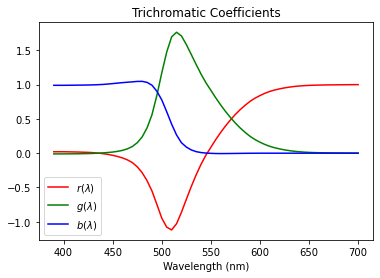

In [17]:
%matplotlib inline

lambdas, r, g, b = np.genfromtxt('color_matching.txt', unpack=True)
plt.plot(lambdas, r, 'r', label='$r(\lambda)$')
plt.plot(lambdas, g, 'g', label='$g(\lambda)$')
plt.plot(lambdas, b, 'b', label='$b(\lambda)$')
plt.xlabel('Wavelength (nm)')
plt.title('Trichromatic Coefficients')
plt.legend()
plt.show()


There are a lot of different trichromatic coefficient functions depending on which primaries are chosen. 
For the graph above using data from [[ref]](https://philservice.typepad.com/Wright-Guild_and_CIE_RGB_and_XYZ.pages.pdf),
the primaries are 630.7 nm, 528.6 nm , and 457.3 nm .
From the table of values in the file *color_matching.txt*, we know that $r(665)=0.995, g(665)=.005$, and $b(665)=0$, so in order to match a light composed of only the wavelength 665 nm, we need of 99.5% of the 630.7 nm primary, 0.5% of the 528.6 nm primary, and none of the third primary in our mixture.

In [18]:
index = 55
print(lambdas[index])
print(r[index])
print(g[index])
print(b[index])

665.0
0.995
0.005
0.0


The trichromatic coefficents are the ratio of primaries needed to match a wavelength of light, so $r(\lambda)+g(\lambda)+b(\lambda)=1$ for all $390 \leq \lambda \leq 700$ nm. However, not every wavelength can be matched experimentally using these three primaries. In order for the participants to match the reference, sometimes it was necessary for them to add a primary amount to the reference itself. In these cases, the trichromatic coefficients can be negative. 

## What is Color?

You may be wondering why we have been describing color will only 3 values. Why not 2 or 4?
The reason is rooted in the anatomy of our eyes.
There are three different types of receptors in the human eye called cones or cone cells. One cone type is more sensitive to longer wavelengths (560 nm), another to medium wavelengths (530 nm), and the other to short wavelengths (420 nm).
This biological stucture of the eye is the basis of the trichromatic theory of color and allows us to describe color in terms of vector spaces. 

In a trichromatic model, the sensor, such as your eye or a camera, is charactrized by three spectral response functions.
The experiments by Wright and Guild indirectly measured these response functions for the human visual system.
Eventually, in the 2000's, Stockman, Sharpe and Fach 
[[ref1]](https://www.sciencedirect.com/science/article/pii/S0042698900000213)
[[ref2]](https://www.sciencedirect.com/science/article/pii/S0042698998002259)
measured the actual cone spectral sensitivity. Their experiemental values are in the file *cone_responses.csv*. The file extension csv stands for comma-separated values. If you open the csv file, you will see commas separating 4 values in each row. 
The first column is wavelength $\lambda$ in nanometers. The second column is the spectral sensitivity $Q_L(\lambda)$ of the L-cones. The third column is the spectral sensitivity $Q_M(\lambda)$ of M-cones. The second column is the spectral sensitivity $Q_S(\lambda)$ of S-cones.

Fill in the code below to plot the three functions. Note that there are no values of $Q_S(\lambda)$ available after $\lambda=$ 615 nm from the experimental data, but we can effectively set those missing values to zero.  

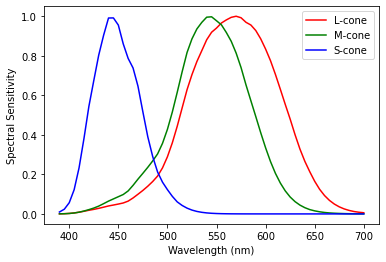

In [19]:
lambdas, L, M, S = np.genfromtxt('cone_responses.csv', delimiter=',', unpack=True, filling_values=0)

# what students are given
# data = np.genfromtxt('cone_responses.csv', 
#                       delimiter=',',              # numbers in the file are separated by commas
#                       filling_values=0)           # if any values are missing, set them to zero
# lambdas = data[:,0]                               # extract only the first column of the data array
# L = # fill in
# M = # fill in
# S = # fill in   

plt.plot(lambdas, L, 'r', label='L-cone')
plt.plot(lambdas, M, 'g', label='M-cone')
plt.plot(lambdas, S, 'b', label='S-cone')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Sensitivity')
plt.legend()
plt.show()


<h3 style="color:red;"><left> Exercise </left></h3>

For each of the three curves, fit the points of the graph with a polynomial so that the mean square error is less than $0.002$. Plot the original data as a scatter plot and the interpolant as a line on the same graph.

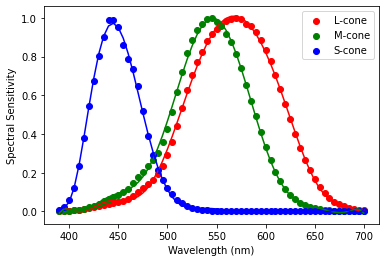

In [20]:
from numpy.polynomial import Polynomial

def mean_square_error(x, y, interpolant):
    mse = np.average((interpolant(x)-y)**2)
    return mse

L_interpolant = Polynomial.fit(lambdas, L, deg=11)
M_interpolant = Polynomial.fit(lambdas, M, deg=10)
S_interpolant = Polynomial.fit(lambdas, S, deg=11)

plt.scatter(lambdas, L, c='r', label='L-cone')
plt.scatter(lambdas, M, c='g', label='M-cone')
plt.scatter(lambdas, S, c='b', label='S-cone')
plt.plot(lambdas, L_interpolant(lambdas), 'r')
plt.plot(lambdas, M_interpolant(lambdas), 'g')
plt.plot(lambdas, S_interpolant(lambdas), 'b')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Sensitivity')
plt.legend()
plt.show()


## Trichromatic Sensor Model

The polynomials you obtained approximate the sensitivity of each type of cone to a different wavelength. A given type of cone cell reacts to a large spectrum of wavelengths, but in different amounts for different frequencies. For example, the L-cones react a lot more at 430 nm (the peak of their corresponding curve on the graph) than to 400 nm. So if the human eye is seeing the color blue at a wavelength of, say, 453 nm, then the L-cones have a high response, while the M and S cells have a small response.
This specific shade of blue, or more precisely, the way we perceive this shade of blue, can thus be recorded using three numbers, namely the responses of the three types of cells. 

When referring to the human visual system, the standard terminology is Red (R) for Long (L), Green (G) for Medium (M) and Blue (B) for Short (S).
Hence, we write the sensor responses as a vector $(R_S,G_S,B_S)$ in $\mathbb{R}^3$, where R,G, and B stand for the three cone types and the subscript S is for stimulus.
We call $(R_S,G_S,B_S)$ the *tristimulus vector* with respect to stimulus S.


For a stimulus $S(\lambda)$, the tristimulus vector values are given by $
    \begin{align*}
        R_S &= \int_{390}^{700} S(\lambda)Q_R(\lambda)d\lambda \\
        G_S &= \int_{390}^{700} S(\lambda)Q_G(\lambda)d\lambda \\
        B_S &= \int_{390}^{700} S(\lambda)Q_B(\lambda)d\lambda \\
    \end{align*}$

<h3 style="color:red;"><left> Exercise </left></h3>

Not all values of $(R_S,G_S,B_S)$ are possible. Give two such examples and explain your choices. 

*student answer here*

## Linearity of Sensor Responses

Suppose two stimuli $S_1(\lambda)$ and $S_2(\lambda)$ yield sensor responses $(R_1,G_1,B_1)$ and $(R_2,G_2,B_2)$, respectively. Then R sensor response to the stimulus $a S_1(\lambda) + b S_2(\lambda)$ is $
    \begin{align*}
        R_S &= \int_{390}^{700} [a S_1(\lambda) + b S_2(\lambda)] Q_R(\lambda)d\lambda \\
        &= \int_{390}^{700} [a S_1(\lambda)Q_R(\lambda) + b S_2(\lambda)Q_R(\lambda)] d\lambda \\
        &= \int_{390}^{700} a S_1(\lambda)d\lambda  + \int_{390}^{700} b S_2(\lambda) Q_R(\lambda)d\lambda \\
        &= a \int_{390}^{700} S_1(\lambda)d\lambda  + b \int_{390}^{700} S_2(\lambda) Q_R(\lambda)d\lambda \\
        &= a R_1 + b R_2.
    \end{align*}$

<h3 style="color:red;"><left> Exercise </left></h3>

__Part 1__

Calculate the tristimulus vector with respect to the stimulus $
    S(\lambda) = \begin{cases}
        1, 450 \leq \lambda \leq 650 \\
        0, \text{ otherwise}
    \end{cases}$
in two ways:
1. using the trapezoidal rule to estimate $R_S,G_S,B_S$
1. using your polynomial interpolants of $Q_R,Q_G,$ and $Q_B$ to integrate symbolically

For the symbolic integration, see NumPy's `polyint` function [here](https://numpy.org/doc/stable/reference/generated/numpy.polyint.html)

__Part 2__

In real life, many types of light contain a continuous range of frequencies in different amounts. For example, a red light will emit a range of frequencies in the red area of the frequency spectrum, as well as potentially small amounts of other frequencies as well. The International Commission on Illumination (CIE) provides standardization of light, illuminants, and color. 
The [CIE D65 illuminant](https://haralick.org/DV/cie_2004_colorimetry.pdf) describes average midday light. 

Calculate the tristimulus vector of the D65 illuminant in two ways
1. using the trapezoidal rule to estimate the three integrals
1. approximating the spectral power distribution of the illuminant with a high enough degree polynomial and using your polynomial interpolants of $Q_R,Q_G,$ and $Q_B$ to integrate symbolically. Justify your choice a "high enough degree polynomial" for the D65 illuminant.


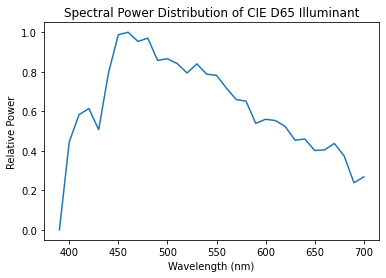

In [21]:
d65 = np.genfromtxt('d65_spectrum.txt', usecols=(1))

plt.plot(lambdas, d65)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Power')
plt.title('Spectral Power Distribution of CIE D65 Illuminant')
plt.show() 

<h3 style="color:red;"><left> Exercise </left></h3>

Write a function depending on $n$ that calculates the tristimulus vector with respect to the stimulus $
    S(\lambda) = \begin{cases}
        1, 500-n \leq \lambda \leq 500+n \\
        0, \text{ otherwise}
    \end{cases}$
What is the result when $n=20$? $n=2$? $n=0.2$? Does is look like the resulting vector is approaching any specific values?

## The Dirac Delta Function

<h3 style="color:red;"><left> Exercise </left></h3>

On a single graph, plot the function
$f(x) = \begin{cases}
    \frac{1}{\Delta}, -\Delta \leq x \leq \Delta \\
    0, \text{ otherwise}
\end{cases}$
for different values of $\Delta$. What happens when $\Delta$ is very small?

In [22]:
# student answer here


The Dirac delta function is $
    \delta(x) = \lim_{\Delta \to 0} f(x)$
and has the property $
    \int_{-\infty}^\infty \delta(x)dx = 1.$




Why is the delta function useful? Consider again the example of observing a pure blue wavelength of 453 nm. 
We can write the monochromatic stimulus as $S(\lambda)=\delta(\lambda - 453)$, 
so the tristimus vector is simply $(Q_R(453), Q_G(453), Q_B(453))$.

## Metamerism

Two stimuli $S_1(\lambda)$ and $S_2(\lambda)$ are said to be *metameric* if $(R_1,G_1,B_1) = (R_2,G_2,B_2)$, i.e., the responses of two different stimuli are identical.

Let's simplify our model by approximating the integral values $R_S,G_S,B_S$ by their left Riemann sums on the domain $390 \leq \lambda \leq 700$.
$\begin{align*}
    R_S = \int_{390}^{700} S(\lambda)Q_R(\lambda)d\lambda & \approx 5[S(390)Q_R(390) + S(395)Q_R(395) + \cdots + S(695)Q_R(695) ] \\
    G_S = \int_{390}^{700} S(\lambda)Q_G(\lambda)d\lambda & \approx 5[S(390)Q_G(390) + S(395)Q_G(395) + \cdots + S(695)Q_G(695) ] \\
    B_S = \int_{390}^{700} S(\lambda)Q_B(\lambda)d\lambda & \approx 5[S(390)Q_B(390) + S(395)Q_B(395) + \cdots + S(695)Q_B(695) ] \\
\end{align*}.$

We can rewrite these equations using matrix notation.
$ \begin{bmatrix}
        R_S \\ G_S \\ B_S
    \end{bmatrix} \approx 5\begin{bmatrix}
        Q_R(390) & Q_R(395) & \cdots & Q_R(695) \\
        Q_G(390) & Q_G(395) & \cdots & Q_G(695) \\
        Q_B(390) & Q_B(395) & \cdots & Q_B(695) \\
    \end{bmatrix}
    \begin{bmatrix}
        S(390) \\ S(395) \\ \vdots \\ S(695)
    \end{bmatrix}.$
    
Let $A := 5\begin{bmatrix}
        Q_R(390) & Q_R(395) & \cdots & Q_R(695) \\
        Q_G(390) & Q_G(395) & \cdots & Q_G(695) \\
        Q_B(390) & Q_B(395) & \cdots & Q_B(695) \\
    \end{bmatrix}.$
To find a metamer for stimulus $S_1(\lambda)$, we want to find a vector $\vec{x}$ that minimizes the function $f(\vec{x}) = || A\vec{x}-\vec{b} ||^2$, where $\vec{b}$ is the tristimulus vector with respect to $S_1(\lambda)$. The algorithm we will use to minimize $f(\vec{x})$ is called gradient descent. The gradient of $f(\vec{x})$ is $
    \nabla f(\vec{x}) = 2 A^T (A\vec{x}-\vec{b}).$

At each iteration of the algorithm, we will calculate the gradient at the current point and then take a small step in the negative direction of the gradient and continue until the norm of the gradient is very small. 

The tristimulus vectors are
[78.60029543 71.23026883 47.7686264 ]
[78.60029543 71.23026883 47.7686264 ]


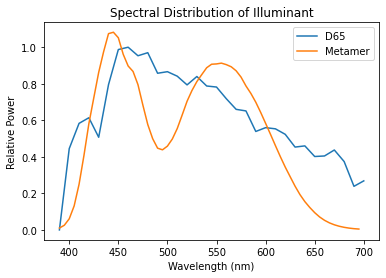

In [23]:
def tristimulus(stimulus): # left riemann sum on domain 390 <= lambda <= 700
    R = 5*np.dot(stimulus, L[:-1])
    G = 5*np.dot(stimulus, M[:-1])
    B = 5*np.dot(stimulus, S[:-1])
    return np.array([R,G,B])

A = 5*np.vstack((L[:-1],M[:-1],S[:-1]))
b = tristimulus(d65[:-1])

def gradient(x):
    # students will fill this in
    r = np.matmul(A,x) - b
    return 2*np.matmul(A.T, r)

def gradient_descent(eta):
    x = np.zeros((len(d65)-1))
    while np.linalg.norm(gradient(x)) > 1e-8:
        x -= eta*gradient(x)
    return x

t = gradient_descent(eta=.001)

print('The tristimulus vectors are')
print(tristimulus(d65[:-1]))
print(tristimulus(t))

plt.plot(lambdas, d65, label='D65')
plt.plot(lambdas[:-1], t, label='Metamer')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Power')
plt.title('Spectral Distribution of Illuminant')
plt.legend()
plt.show()

<h3 style="color:red;"><left> Exercise </left></h3>

Let $f$ be the function that takes as input a visual stimulus $S(\lambda)$ and returns the tristimulus vector of $S(\lambda)$ in $\mathbb{R}^3$.

Determine if the follow statements are true or false and justify your answer.
1. $f$ is injective.
1. $f$ is surjective.

## Quantization

We mentioned before that we have $256 \times 256 \times 256 = 16,777,216$ colors to work with since there are 256 integers to choose from for a red, green, and blue channel value. This is one form of color quantization since there are infinitely many colors and we've reduced that down to about 16.7 million. In many applications, further quantization is necessary. Quantization is used for image compression by reducing the information of an image so that it requires less storage, and some devices like phones or printers only support a certain palette of colors. 

Let's start with converting an image to a grayscale image. A formula to convert an RGB vector to a grayscale value is $
    0.2989 R + 0.5870 G + 0.1140 B $
where $R$ is the red channel value, $G$ is the green channel value, and $B$ is the blue channel value.

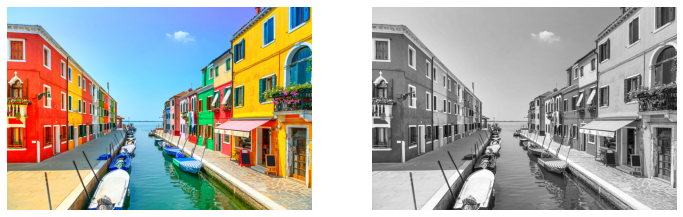

In [4]:
from PIL import Image
%matplotlib inline

img = Image.open('italy.jpg')
gray_img = Image.open('gray_italy.jpg')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(np.array(img))
ax[0].axis('off')            
ax[1].imshow(np.array(gray_img), cmap='gray')
ax[1].axis('off')
plt.show()

<h3 style="color:red;"><left> Exercise </left></h3>

Write a function that returns the grayscale of an image.

In [ ]:
# def rgb2gray(img):
#     img = np.array(img)
#     return np.dot(img, [0.2989, 0.5870, 0.1140])

What happens if we replace the RGB vector with the scaled norm of the vector?

<h3 style="color:red;"><left> Exercise </left></h3>

Write a function that finds this new kind of 'grayscale' image.

In [34]:
# student answer here

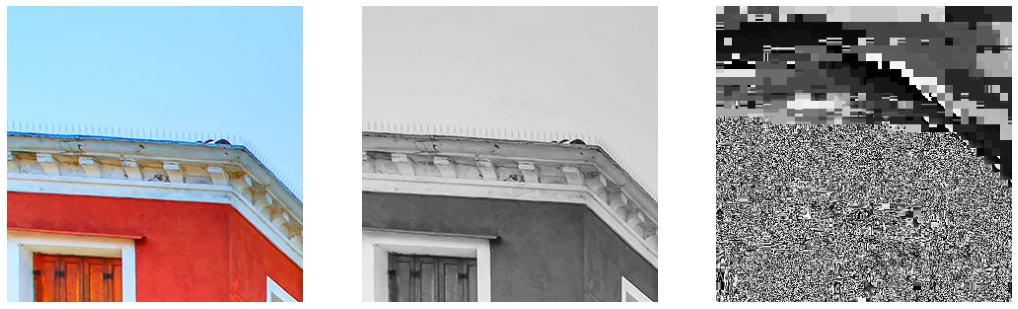

In [25]:
img = np.array(img)[:300,:300]
gray1 = np.dot(img, [0.2989, 0.5870, 0.1140])
gray2 = np.zeros(img.shape[:2])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gray2[i,j] = np.dot(img[i,j],img[i,j])*255/(3*255**3)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax[0].imshow(img)
ax[0].axis('off')            
ax[1].imshow(gray1, cmap='gray')
ax[1].axis('off')
ax[2].imshow(gray2, cmap='gray')
ax[2].axis('off')
plt.show()

Now, suppose we are only able to use 10 gray values instead of the usual 256. We can do this with a quantization algorithm.
Uniform quantization is a simple type of quantization where the quantization levels are equally spaced. Here's how the uniform quantization function looks.

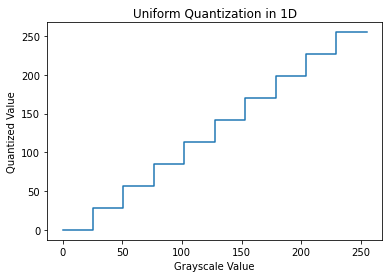

In [101]:
num_levels=10
x = np.linspace(0,255,num_levels+1)
y = np.linspace(0,255,num_levels)
  
plt.step(x, np.append(y,y[-1]), where='post')
plt.xlabel('Grayscale Value')
plt.ylabel('Quantized Value')
plt.title('Uniform Quantization in 1D')
plt.show()

<h3 style="color:red;"><left> Exercise </left></h3>

Write a function that converts an image to grayscale and then uniformly quantizes the gray image with $k$ levels. Show your results when $k=2,10,24,$ and $100$.

In [ ]:
# student answer here

We can also quantize color images. Let's define our own palette of colors and map each to pixel to 1 of 4 options based on Euclidean distance.
The distance between the two colors $(R_1,G_1,B_1)$ and $(R_2,G_2,B_2)$ is $
    d = \sqrt{ (R_1-R_2)^2 + (G_1-G_2)^2 + (B_1-B_2)^2 }.$

<h3 style="color:red;"><left> Exercise </left></h3>

__Part 1:__ Choose your own palette of at least 4 colors and write a function that quantizes a color image to your palette based on the shortest Euclidean distance among the chosen colors.

__Part 2:__ Quantize your image again but this time based on the shortest Euclidean distance in a different color space, namely the CIE L\*a\*b\* space. That is, transform the RGB vectors to L\*a\*b\* vectors and then compute the distance between the two L\*a\*b\* vectors. See the example below on how to convert from RGB to CIE L\*a\*b\*.

__Part 3:__ Do you notice any differences in the two quantization methods? What if you add more or less colors to your palette?

In [32]:
from skimage import color # will need to add skimage to science environment
rgb = np.array([0,0,255])                           #RGB coordinates
lab = color.rgb2lab(rgb/255, illuminant="D65")      #Lab coordinates
print('RGB {} -> Lab {}'.format(rgb,lab))

RGB [  0   0 255] -> Lab [  32.29567257   79.18559091 -107.85730021]


In [33]:
# student answer here

There are methods for adaptive color quantization like in the example below where the 'best' 15 colors are chosen for one specific image, but we won't explore them for now.

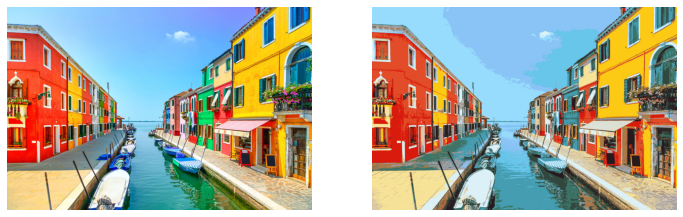

In [10]:
img = Image.open('italy.jpg')
quant_img = img.quantize(colors=15)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(img)
ax[0].axis('off')            
ax[1].imshow(quant_img)
ax[1].axis('off')
plt.show()

## Gamma Correction

Consider the game of "guess how many jellybeans (or other small objects) are in the jar". This game would be very uninteresting if there were only 4 jellybeans in the jar. We would have a much harder time visually distinguishing between 140 and 141 jellybeans, but there is some threshold where, say, 180 jellybeans looks noticeably different from 140 jellybeans. If you've been in a psychology class, you may have heard of [Weber's Law](https://en.wikipedia.org/wiki/Weber%E2%80%93Fechner_law), which quantifies human perception in response to a stimulus like an increase in jellybeans. Weber's Law suggests that this threshold is proportional to the relative stimulus increment. In other words, if $dV$ is a just perceivable difference in the amount of jellybeans $J$, then for a constant $\alpha$, $
    dV = \alpha \frac{dJ}{J}.$
Integrating both sides, we get $
    V = \alpha \ln(J).$
Weber's Law also applies to how we perceive light and color. The relationship we just derived suggests that we should quantize color levels logarithmically instead of uniformly so the levels are farther apart as the value increases. 

<h3 style="color:red;"><left> Exercise </left></h3>

__Part 1:__
Write a script that displays Purdue Old Gold on the NeoPixels.

It doesn't look quite right. That's because according to Weber's Law we need to adjust the brightness levels for the NeoPixel to be logarithmic. This process is called *gamma correction*. The new gamma corrected RGB values are $
    R_{new} = 255(R/255)^\gamma, \quad G_{new} = 255(G/255)^\gamma, \quad B_{new} = 255(B/255)^\gamma.$
Typically, $\gamma=2.2$ for cameras and scanners. 

__Part 2:__
Write a function that gamma corrects an input of RGB values. What does Purdue gold look like now? Try different values for $1 \leq \gamma \leq 10$. Report your findings. 


In [11]:
gamma = 2.2
gold = np.array([206, 184, 136])
print(np.round(255*(gold/255)**(gamma)))

[159. 124.  64.]


<h3 style="color:red;"><left> Exercise </left></h3>

Create an M&M color detector with [rgb sensor](https://www.amazon.com/Teyleten-Robot-TCS-34725-TCS34725-Recognition/dp/B087Z3K6P5/ref=sr_1_4?keywords=tcs34725+rgb+color+sensor&qid=1646071669&sprefix=TCS34725+%2Caps%2C215&sr=8-4)

__will need to add a review of modules__


## Edge Detection

Suppose we have a grayscale image and we want to outline all of the objects in the image. We can start by looking for all of the vertical edges in the image. An edge occurs when there is a significant change in intensity. Let's look a very small piece of the grayscale Italy image show in red.

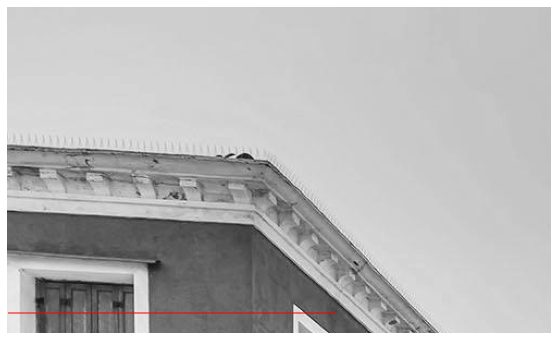

In [183]:
import matplotlib.patches as patches

gray_img = np.array(Image.open('gray_italy.jpg'))[:300,:500]

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(gray_img, cmap='gray')
rect = patches.Rectangle((0, 280), 300, 1, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.axis('off')
plt.show()

By plotting the grayscale values as a 1D function, we can see how the grayscale values change moving down the row from left to right. This function is a bit noisy, but we have seen previously how to smooth it out by taking a rolling average.

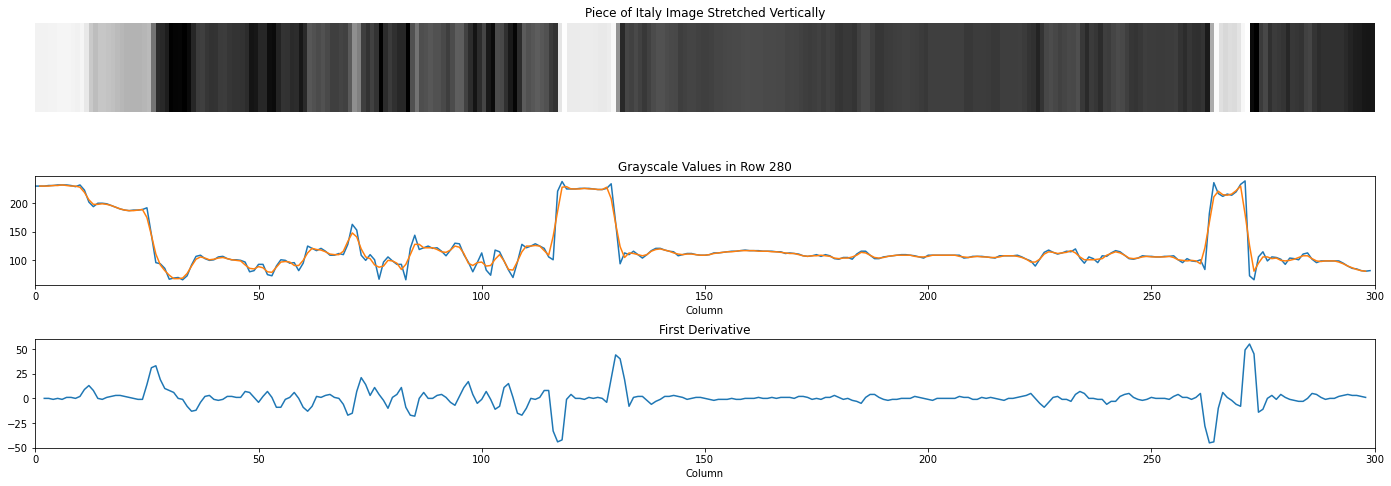

In [182]:
def rolling_centered_average(x, n):
    out = np.full_like(x, np.nan)
    out[(n - 1) // 2 : -(n // 2)] = np.convolve(x, np.ones(n), mode="valid") / n
    return out

gray_img = np.array(Image.open('gray_italy.jpg'))
slice = gray_img[280:281,:300]

x = gray_img[280,:300]
smoothed = rolling_centered_average(gray_img[280,:300],3)
first_deriv = np.convolve(smoothed[1:-1], np.array([-1,1]), mode="valid")

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 8),gridspec_kw={'hspace': 0.5})
ax[0].imshow(np.tile(slice,(20,1)), cmap='gray')
ax[0].axis('off')     
ax[0].set_title('Piece of Italy Image Stretched Vertically')  

ax[1].plot(np.arange(0,300),x)
ax[1].plot(np.arange(1,299), smoothed[1:-1])
ax[1].set_xlabel('Column')
ax[1].set_xlim(0,300)
ax[1].set_title('Grayscale Values in Row 280')

ax[2].plot(np.arange(2,299),first_deriv)
ax[2].set_xlabel('Column')
ax[2].set_xlim(0,300)
ax[2].set_title('First Derivative')
plt.show()

We can see large spikes and dips in the graph of the first derivative where there are abrupt changes in the grayscale values of the row in the image. We can find edges by detecting the local minima and maxima of the first derivative! Since images have two dimensions, a row and column coordinate for each pixel, the example we just went through is a partial derivative.

Let $f(x,y)$ be a continuous grayscale image mapping $\mathbb{R}^2$ to $\mathbb{R}$.
When we read in an image in Python we are observing a sampling of points of $f(x,y)$ which we will call $f_d(n,m)$.
So, $
    f_d(n,m) = f(n\Delta x, m \Delta y).$
where $\Delta x$ and $\Delta y$ are the sampling distances along the x and y-axis, respectively.
Taking partial derivatives of $f$ can be approximated by the forward difference formulas, $
    \begin{align*}
        \frac{df}{dx}(n\Delta x,m \Delta y) &\approx \frac{f(n\Delta x+\Delta x,m \Delta y)-f(n\Delta x,m \Delta y)}{\Delta x}
                                                = \frac{f_d(n+1,m)-f_d(n,m)}{\Delta x} \\
        \frac{df}{dy}(n\Delta x,m \Delta y) &\approx \frac{f(n\Delta x,m \Delta y+\Delta y)-f(n\Delta x,m \Delta y)}{\Delta y}
                                                = \frac{f_d(n,m+1)-f_d(n,m)}{\Delta y}
    \end{align*}$



The gradient of $f$ is $
    \nabla f = \begin{pmatrix}  \frac{df}{dx} \\  \\ \frac{df}{dy}\end{pmatrix}$
with magnitude $
    |\nabla f| = \sqrt{\left(\frac{df}{dx}\right)^2 + \left(\frac{df}{dy}\right)^2}$
and direction $
    \theta = \arctan \left(\left(\frac{df}{dy}\right) / \left(\frac{df}{dx}\right)\right).$


<h3 style="color:red;"><left> Exercise </left></h3>

__Part 1:__ What are the physical interpretations for $|\nabla f|$ and $\theta$?

__Part 2:__  Plot the magnitute of the gradient of an image.

__Part 3:__  Pick a threshold for how large the gradient needs to be in order to detect an edge. Justify your choice. 

__Part 4:__  Plot the edge image so that edge pixels are white and non-edge pixels are black. 

__Part 5:__ Repeat Parts 2-4 using the symmetric difference formulas for partial derivatives.$
    \begin{align*}
        \frac{df}{dx}(n\Delta x,m \Delta y) &\approx \frac{f_d(n+1,m)-f_d(n-1,m)}{2\Delta x} \\
        \frac{df}{dy}(n\Delta x,m \Delta y) &\approx \frac{f_d(n,m+1)-f_d(n,m-1)}{2\Delta y}
    \end{align*}$

__Part 6:__ Describe the differences, if any, between the two edge detectors. 

In [ ]:
from scipy import signal

gray_img = np.array(Image.open('gray_italy.jpg'))

# PARTS 2-4
dfdy = signal.convolve2d(gray_img, np.array([[-1,1]]), boundary='symm', mode='same')
dfdx = signal.convolve2d(gray_img, np.array([[1],[-1]]), boundary='symm', mode='same')
mag = (dfdy**2+dfdx**2)**(0.5)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 8))
ax[0].imshow(gray_img, cmap='gray')
ax[0].axis('off')     
ax[0].set_title('Original Image')  

ax[1].imshow(dfdy, cmap='gray')
ax[1].axis('off')
ax[1].set_title('df/dy')

ax[2].imshow(dfdx, cmap='gray')
ax[2].axis('off')
ax[2].set_title('df/dx')

ax[3].imshow(mag, cmap='gray')
ax[3].axis('off')
ax[3].set_title('Magnitude of Gradient')
plt.show()

thresh = np.quantile(mag,q=.85)
print(thresh)
plt.imshow(mag > thresh, cmap='gray')
plt.axis('off')
plt.show()

# PART 5
dfdy = signal.convolve2d(gray_img, np.array([[-1,0,1]]), boundary='symm', mode='same') / 2
dfdx = signal.convolve2d(gray_img, np.array([[1],[0],[-1]]), boundary='symm', mode='same') / 2
mag = (dfdy**2+dfdx**2)**(0.5)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 8))
ax[0].imshow(gray_img, cmap='gray')
ax[0].axis('off')     
ax[0].set_title('Original Image')  

ax[1].imshow(dfdy, cmap='gray')
ax[1].axis('off')
ax[1].set_title('df/dy')

ax[2].imshow(dfdx, cmap='gray')
ax[2].axis('off')
ax[2].set_title('df/dx')

ax[3].imshow(mag, cmap='gray')
ax[3].axis('off')
ax[3].set_title('Magnitude of Gradient')
plt.show()

thresh = np.quantile(mag,q=.85)
print(thresh)
plt.imshow(mag > thresh, cmap='gray')
plt.axis('off')
plt.show()

The previous exercise has you detect edges based on the first derivative. Another approach is to build an edge detector based on the second derivative because when the second derivative is zero, there is a local minimum or maximum in the first derivative. The strategy is to approximate $\frac{d^2f}{dx^2}, \frac{d^2f}{dxdy}$ and $\frac{d^2f}{dy^2}$ using the information we have available, that is $f_d(n,m)$, and then check where the second derivative changes from positive to negative or vice versa.

Let's simplify for a moment and see how to approach this in 1 dimension. Suppose $g(x)$ is a continuous function and is infinitely differentiable at the point $a$. The Taylor series of $g(x)$ at $a$ is $
    g(x) = g(a) + \frac{g'(a)}{1}(x-a) + \frac{g''(a)}{1\cdot 2}(x-a)^2 + \frac{g'''(a)}{1\cdot 2\cdot 3}(x-a)^3 + \cdots  $
This sum goes on forever, but if we truncate after a few terms we can get a good estimation of the function $g(x)$ near $a$.
Say we want to approximate $g'(a)$.
By evaluating $g(x)$ at $x=a+h$ and $x=a-h$ where $h>0$ is a small positive number and only keeping the first two terms in the Taylor series, $
    \begin{align*}
        g(a+h) &\approx g(a) + \frac{g'(a)}{1}((a+h)-a) = g(a) + g'(a)h\\
        g(a-h) &\approx g(a) + \frac{g'(a)}{1}((a-h)-a) = g(a) - g'(a)h\\
    \end{align*}$
Now, subtract $g(a+h)$ and $g(a-h)$ to get $
    g(a+h) - g(a-h) \approx 2g'(a)h \quad \Rightarrow \quad g'(a) \approx \frac{g(a+h)-g(a-h)}{2h},$
which is the same symmetric difference formula you've seen before.
To approximate the second derivative $g''(a)$, use the estimations $
    \begin{align*}
        g(a+h) &\approx g(a) + \frac{g'(a)}{1}((a+h)-a) + \frac{g''(a)}{1\cdot 2}((a+h)-a)^2 = g(a) + g'(a)h + g''(a)h^2 \\
        g(a-h) &\approx g(a) + \frac{g'(a)}{1}((a-h)-a) + \frac{g''(a)}{1\cdot 2}((a-h)-a)^2 = g(a) - g'(a)h + g''(a)h^2 \\
    \end{align*}$
    
### <span style="color:red">Exercise</span>

Finish the derivation of the estimation of $g''(a)$. Your estimation should only depend on function values of $g$.


Going back to the 2-dimensional case, the Taylor series of the funtion $f(x,y)$ at the point $(a,b)$ is $
    f(x,y) = f(a,b) + (x-a)\frac{df}{dx}(a,b) + (y-b)\frac{df}{dy}(a,b) + 
        \frac{(x-a)^2\frac{d^2f}{dx^2}(a,b) + 2(x-a)(y-b)\frac{d^2f}{dxdy}(a,b) + (y-b)^2\frac{d^2f}{dy^2}(a,b)}{1 \cdot 2} + \cdots$

The second partial derivative test states that $f(x,y)$ has a local minimum, local maximum, or saddle point at the point $(a,b)$ if $
    \left[\frac{d^2f}{dx^2}(a,b) \right] \left[\frac{d^2f}{dy^2}(a,b) \right] - \left[\frac{d^2f}{dxdy}(a,b) \right]^2 = 0.$

Similar to the 1-dimensional case, we can use Taylor series to derive approximations for $\frac{d^2f}{dx^2},\frac{d^2f}{dy^2}$ and $\frac{d^2f}{dxdy}$.

For $\frac{d^2f}{dx^2}$, evaluate $f$ at $(x,y)=(a+h,b)$ and $(x,y)=(a-h,b)$ where $h>0$ is a small positive number.
$\begin{align*}
    f(a+h,b) &\approx f(a,b) + h\frac{df}{dx}(a,b) + \frac{h^2\frac{d^2f}{dx^2}(a,b)}{2} \\
    f(a-h,b) &\approx f(a,b) - h\frac{df}{dx}(a,b) + \frac{h^2\frac{d^2f}{dx^2}(a,b)}{2} \\
    \Rightarrow f(a+h,b)+f(a-h,b) &\approx 2f(a,b) + h^2\frac{d^2f}{dx^2}(a,b) \\
    \Rightarrow \frac{d^2f}{dx^2}(a,b) &\approx \frac{f(a+h,b)+f(a-h,b)-2f(a,b)}{h^2}
\end{align*}$

### <span style="color:red">Exercise</span>

Derive the estimations of $\frac{d^2f}{dy^2}$ and $\frac{d^2f}{dxdy}$. Your estimations should only depend on function values of $f$.

### <span style="color:red">Exercise</span>

Use the second order method to detect edges in an image. Compare the result to the other first-order edge detectors you implemented in a previous exercise.

In [ ]:
# student answer here

### <span style="color:red">Exercise</span>

Use your phone to take a picture.
Choose one of the three edge detectors we have implemented.
Apply sharpening kernel only on edge pixels

In [ ]:
# student answer here